In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib
from prophet import Prophet

c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
# Read the CSV file, skipping the first four lines
df = pd.read_csv("datasets/data.csv", skiprows=4, on_bad_lines='skip')

# Display the first few rows of the DataFrame
print(df.head())


     Date  Anomaly
0  185001    -1.23
1  185002    -0.86
2  185003    -0.72
3  185004    -0.77
4  185005    -0.77


In [3]:
df.tail()

,Date,Anomaly
2089,202402,2.04
2090,202403,2.06
2091,202404,2.03
2092,202405,1.95
2093,202406,1.91


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')

In [5]:
df.head()

,Date,Anomaly
0,1850-01-01,-1.23
1,1850-02-01,-0.86
2,1850-03-01,-0.72
3,1850-04-01,-0.77
4,1850-05-01,-0.77


In [6]:
df_ = df.copy()

In [7]:
df.set_index("Date",inplace=True)

In [8]:
df.head()

,Anomaly
Date,
1850-01-01,-1.23
1850-02-01,-0.86
1850-03-01,-0.72
1850-04-01,-0.77
1850-05-01,-0.77


In [9]:
time_series = df["Anomaly"]

In [10]:
ses_model = SimpleExpSmoothing(time_series)

ses_fit = ses_model.fit(optimized=True)

forecast = ses_fit.forecast(steps=24)

c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


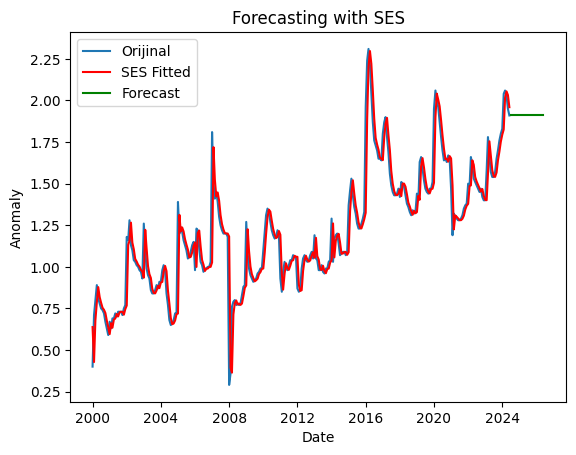

In [11]:
time_series_filtered = time_series['2000':]
fitted_values_filtered = ses_fit.fittedvalues['2000':]

plt.plot(time_series_filtered, label='Orijinal')
plt.plot(fitted_values_filtered, label='SES Fitted', color='red')
plt.plot(forecast.index, forecast, label='Forecast', color='green')  

plt.title('Forecasting with SES')
plt.xlabel('Date')
plt.ylabel('Anomaly')
plt.legend()
plt.show()

In [12]:
joblib.dump(ses_fit, "ses_model.pkl")

['ses_model.pkl']

In [13]:
holt_model = ExponentialSmoothing(time_series, trend="add", seasonal=None, seasonal_periods=None)
holt_fit = holt_model.fit(optimized=True)

forecast = holt_fit.forecast(steps=24) 

c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


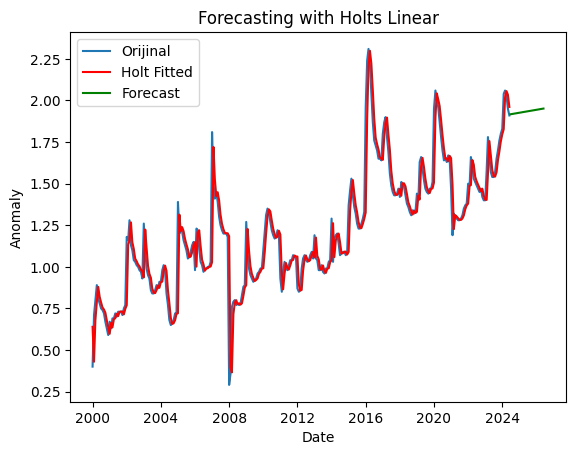

In [14]:
time_series_filtered = time_series['2000':]
fitted_values_filtered = holt_fit.fittedvalues['2000':]

plt.plot(time_series_filtered, label='Orijinal')
plt.plot(fitted_values_filtered, label='Holt Fitted', color='red')
plt.plot(forecast.index, forecast, label='Forecast', color='green')  

plt.title('Forecasting with Holts Linear')
plt.xlabel('Date')
plt.ylabel('Anomaly')
plt.legend()
plt.show()

In [15]:
joblib.dump(holt_fit, "holt_fit.pkl")

['holt_fit.pkl']

In [16]:
holt_winters_model = ExponentialSmoothing(time_series, trend='add', seasonal='add', seasonal_periods=12)
holt_winters_fit = holt_winters_model.fit(optimized=True)

forecast = holt_winters_fit.forecast(steps=24)

c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


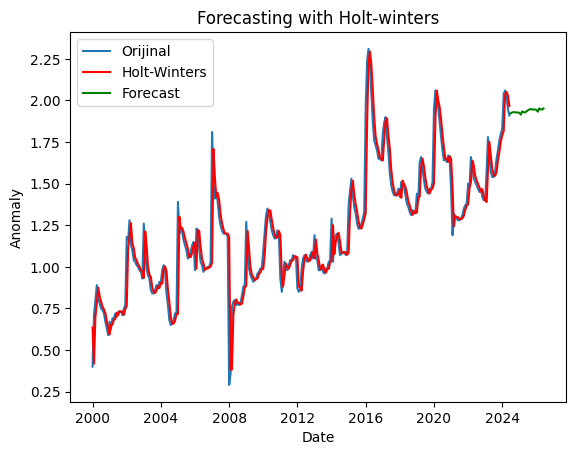

In [17]:
time_series_filtered = time_series['2000':]
fitted_values_filtered = holt_winters_fit.fittedvalues['2000':]

plt.plot(time_series_filtered, label='Orijinal')
plt.plot(fitted_values_filtered, label='Holt-Winters', color='red')
plt.plot(forecast.index, forecast, label='Forecast', color='green')  

plt.title('Forecasting with Holt-winters')
plt.xlabel('Date')
plt.ylabel('Anomaly')
plt.legend()
plt.show()

In [18]:
joblib.dump(holt_winters_fit, "holt_winters_fit.pkl")

['holt_winters_fit.pkl']

In [19]:
arima_model = ARIMA(time_series, order=(1, 1, 1))
arima_fit = arima_model.fit()

forecast = arima_fit.forecast(steps=24)

c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


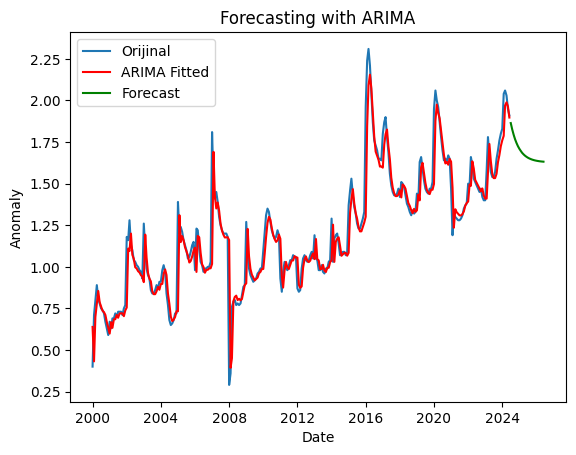

In [20]:
time_series_filtered = time_series['2000':]
fitted_values_filtered = arima_fit.fittedvalues['2000':]


plt.plot(time_series_filtered, label='Orijinal')
plt.plot(fitted_values_filtered, label='ARIMA Fitted', color='red')
plt.plot(forecast.index, forecast, label='Forecast', color='green')  

plt.title('Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Anomaly')
plt.legend()
plt.show()

In [21]:
joblib.dump(arima_fit, "arima_fit.pkl")

['arima_fit.pkl']

In [22]:
sarima_model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

forecast = sarima_fit.forecast(steps=24)

c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


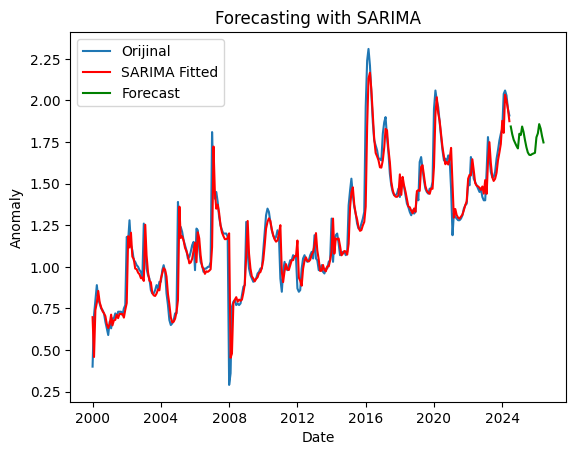

In [23]:
time_series_filtered = time_series['2000':]
fitted_values_filtered = sarima_fit.fittedvalues['2000':]

plt.plot(time_series_filtered, label='Orijinal')
plt.plot(fitted_values_filtered, label='SARIMA Fitted', color='red')
plt.plot(forecast.index, forecast, label='Forecast', color='green') 

plt.title('Forecasting with SARIMA')
plt.xlabel('Date')
plt.ylabel('Anomaly')
plt.legend()
plt.show()

In [24]:
joblib.dump(sarima_fit, "sarima_fit.pkl")

['sarima_fit.pkl']

In [25]:
df_.rename(columns={"Date":"ds","Anomaly":"y"}, inplace=True)

In [26]:
prophet_model = Prophet()
prophet_model.fit(df_)

16:47:41 - cmdstanpy - INFO - Chain [1] start processing
16:47:42 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = prophet_model.make_future_dataframe(periods=24, freq="M")
prop_forecast = prophet_model.predict(future)

c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [28]:
prop_forecast['ds'] = pd.to_datetime(prop_forecast['ds'])
prop_forecast['yhat'] = pd.to_numeric(prop_forecast['yhat'])

In [29]:
joblib.dump(prophet_model, "prophet_model.pkl")

['prophet_model.pkl']

c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\MEHMET\Desktop\Temperature_anomaly_prediction\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will retur

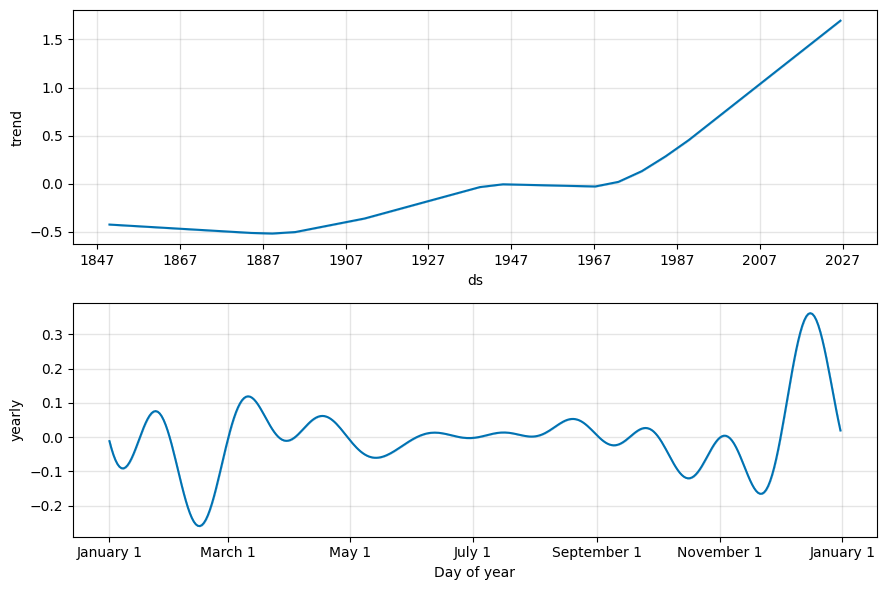

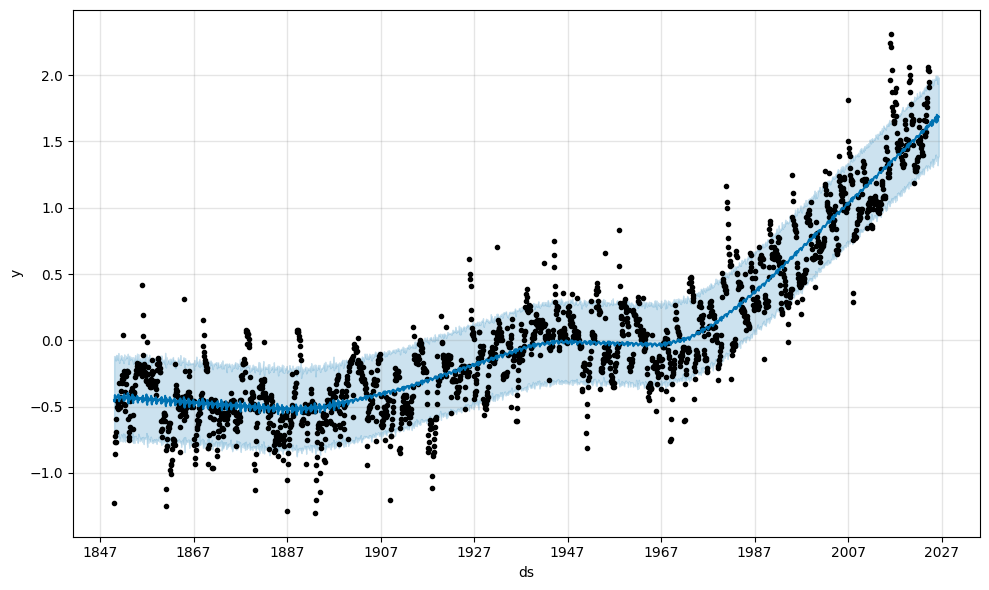

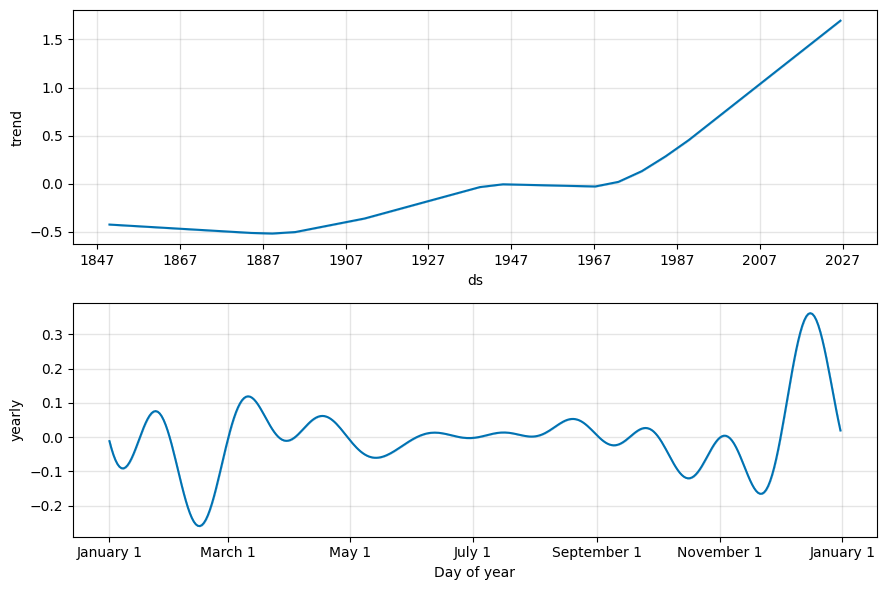

In [30]:
prophet_model.plot(prop_forecast)
prophet_model.plot_components(prop_forecast)

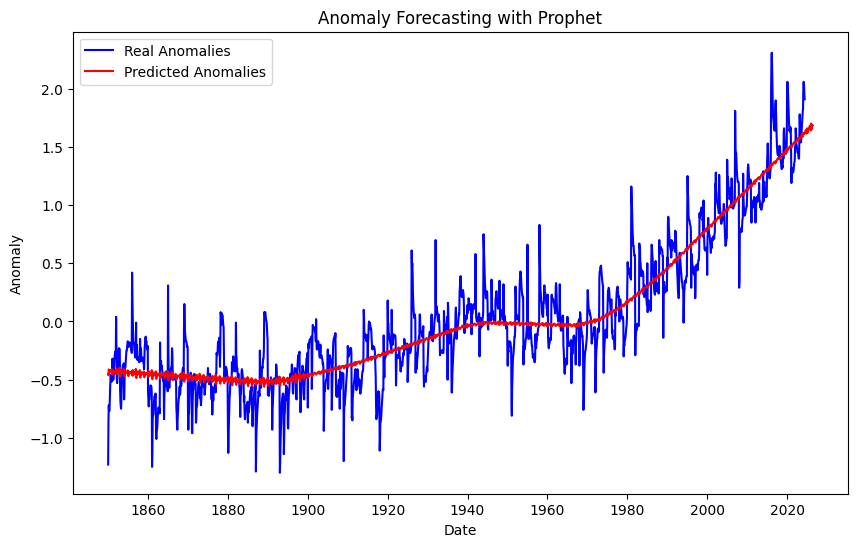

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df_["ds"], df_['y'], label='Real Anomalies', color='blue')
plt.plot(prop_forecast["ds"], prop_forecast["yhat"], label='Predicted Anomalies', color='red')
plt.title('Anomaly Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Anomaly')
plt.legend()
plt.show()